# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type.In Step 1, use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
num_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

num_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type.  In Step 2, use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.


driver_total_bycitytype = city_data_df.groupby(["type"]).sum()["driver_count"] 
driver_total_bycitytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type.   use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.


fare_total_bycitytype = pyber_data_df.groupby(["type"]).sum()["fare"] 
fare_total_bycitytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.

average_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] /num_rides_by_city_type
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type.  calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_per_driver = fare_total_bycitytype / driver_total_bycitytype
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below:.

PyBer_summary = pd.DataFrame({
    "Total Rides": num_rides_by_city_type,
    "Total Drivers": driver_total_bycitytype,
    "Total Fares": fare_total_bycitytype,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver" : average_fare_per_driver
    
})
PyBer_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name   use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
PyBer_summary.index.name = None
PyBer_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns. format the columns of the Pyber summary DataFrame to look like this:

PyBer_summary = pd.DataFrame({
    "Total Rides": num_rides_by_city_type,
    "Total Drivers": driver_total_bycitytype,
    "Total Fares": fare_total_bycitytype,
    "Average Fare per Ride": round(average_fare_per_ride,2),
    "Average Fare per Driver" : round(average_fare_per_driver,2)
     
})
PyBer_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [13]:
PyBer_summary['Total Fares'] = PyBer_summary['Total Fares'].map('${:,.2f}'.format)

PyBer_summary["Average Fare per Ride"] = PyBer_summary["Average Fare per Ride"].map('${:.2f}'.format)

PyBer_summary["Average Fare per Driver"] = PyBer_summary["Average Fare per Driver"].map('${:.2f}'.format)

PyBer_summary['Total Rides'] = PyBer_summary['Total Rides'].map ("{:,}".format)

PyBer_summary['Total Drivers'] = PyBer_summary['Total Drivers'].map ("{:,}".format)

PyBer_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame.  create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.

PyBer_two = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
PyBer_two

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date. use the provided code snippet to reset the index. This is needed to use the pivot() function in the next step (Step 3).
PyBer_two = PyBer_two.reset_index()
PyBer_two

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function. In Step 3, use the pivot() function to convert the DataFrame from the previous step so that the index is the "date," each column is a city "type," and the values are the "fare."

#THIS IS CALLED THE PANDAS RESAMPLES FUNCTION DATAFRAME.RESAMPLE()

#After this step, you’ll see that each cell has the total fare for the date and time, as shown in the following image.
# df = df.reset_index()


PyBer_two_pivot = PyBer_two.pivot(index="date", columns="type", values="fare")
PyBer_two_pivot.tail(10)




type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

PyBer_two_pivot = PyBer_two.pivot(index="date", columns="type", values="fare")
PyBer_two_pivot.tail(10)


type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [23]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# Using pandas.DataFrame.query() to select DataFrame Rows
#start_date = '2021-11-15'
#end_date   = '2021-11-18'
#df2 = df.query('InsertedDates >= @start_date and InsertedDates <= @end_date')
#https://sparkbyexamples.com/pandas/pandas-select-dataframe-rows-between-two-dates/

PyBer_3exciting = PyBer_two_pivot.loc['2019-01-01':'2019-04-29']
PyBer_3exciting



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.


PyBer_two_pivot.index = pd.to_datetime(PyBer_two_pivot.index)
PyBer_two_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [33]:
# 7. Check that the datatype for the index is datetime using df.info()
PyBer_two_pivot.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

PyBer_two_pivot = PyBer_two_pivot.resample("W").sum()
PyBer_two_pivot.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 1000x200 with 0 Axes>

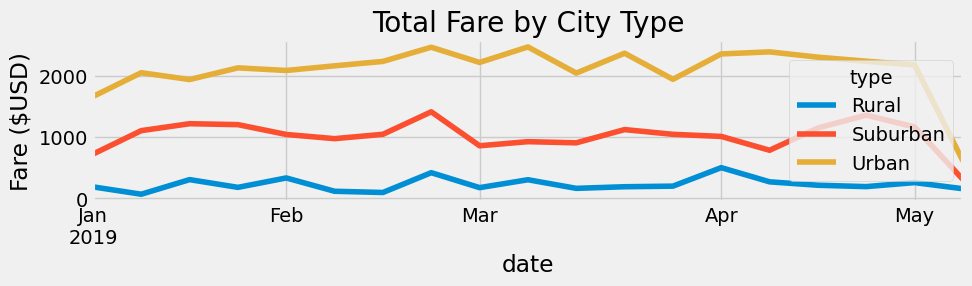

<function print>

In [49]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

plt.style.use('fivethirtyeight')
fig= plt.figure(figsize=(10,2))
savedplot = PyBer_two_pivot.plot(figsize=(10,2))
savedplot.set_title("Total Fare by City Type")
savedplot.set_ylabel("Fare ($USD)")

plt.show()

print